In [152]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) + '/src/'
if module_path not in sys.path:
    sys.path.insert(0, module_path)
import numpy as np
from matplotlib import pyplot as plt

import torch
from pupil import ScalarCartesianPupil, ScalarPolarPupil, VectorialCartesianPupil, VectorialPolarPupil
from propagator import ScalarCartesianPropagator, ScalarPolarPropagator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
n_pix_pupil = 1024
n_pix_psf = 201
NA = 0.9
wavelength = 632
fov = 1500
defocus = 0
n_defocus = 1

pupil1 = ScalarCartesianPupil(n_pix_pupil)
pupil2 = ScalarPolarPupil(n_pix_pupil)
# pupil3 = VectorialCartesianPupil(n_pix_pupil)
# pupil4 = VectorialPolarPupil(n_pix_pupil)

tensor(0.5630)
torch.Size([1, 1, 201, 201])


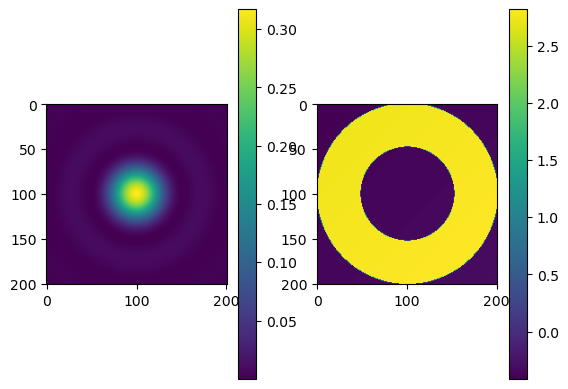

In [172]:
propagator1 = ScalarCartesianPropagator(pupil1, n_pix_psf=n_pix_psf, wavelength=wavelength, NA=NA, fov=fov,
                                        defocus_min=0, defocus_max=defocus, n_defocus=n_defocus)
field1 = propagator1.compute_focus_field()
print(torch.max(torch.abs(field1)))

idx = 0
print(field1.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field1[idx,...].squeeze())**2)
plt.colorbar()
plt.subplot(122)
plt.imshow(torch.angle(field1[idx,...].squeeze()))
plt.colorbar()
plt.show()

tensor(0.5641)
torch.Size([1, 1, 201, 201])


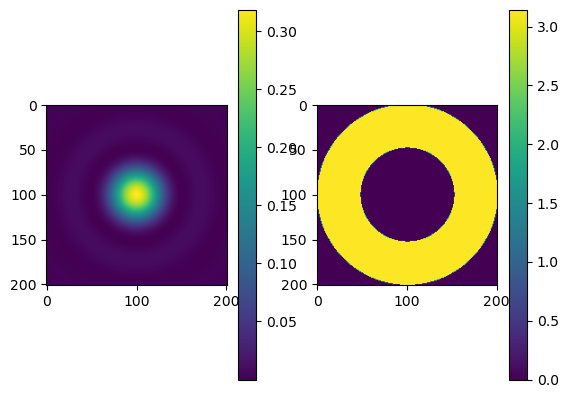

In [173]:
propagator2 = ScalarPolarPropagator(pupil2, n_pix_psf=n_pix_psf, wavelength=wavelength, NA=NA, fov=fov,
                                    defocus_min=0, defocus_max=defocus, n_defocus=n_defocus)
field2 = propagator2.compute_focus_field()
print(torch.max(torch.abs(field2)))

idx = 0
print(field2.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field2[idx,...].squeeze())**2)
plt.colorbar()
plt.subplot(122)
plt.imshow(torch.angle(field2[idx,...].squeeze()))
plt.colorbar()
plt.show()

tensor(0.0030)


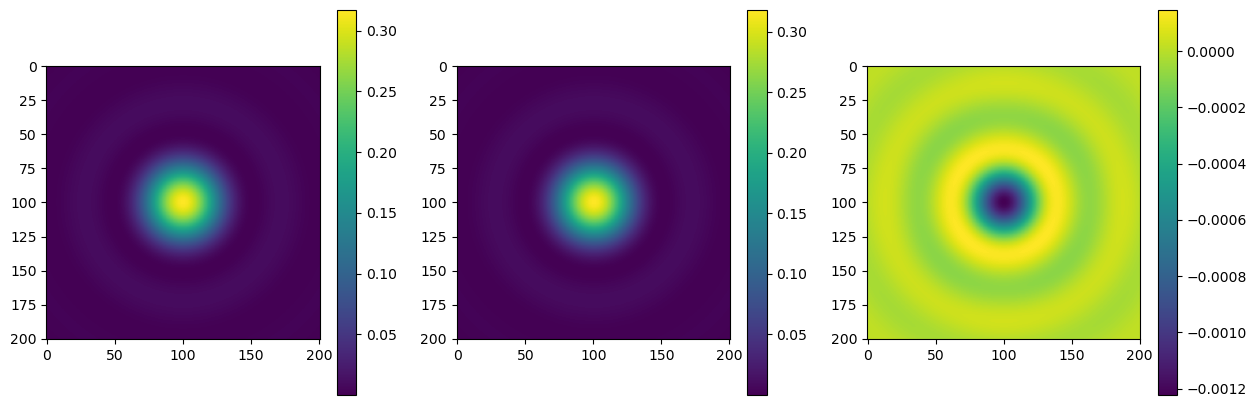

In [174]:
x = torch.abs(field1[idx,...].squeeze())**2
y = torch.abs(field2[idx,...].squeeze())**2

# norm error
print(torch.norm(y - x) / torch.norm(x))

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(x)
plt.colorbar()
plt.subplot(132)
plt.imshow(y)
plt.colorbar()
plt.subplot(133)
plt.imshow(x - y)
plt.colorbar()
plt.show()

In [175]:
print(torch.argmax(x))
print(torch.argmax(y))

tensor(20200)
tensor(20200)


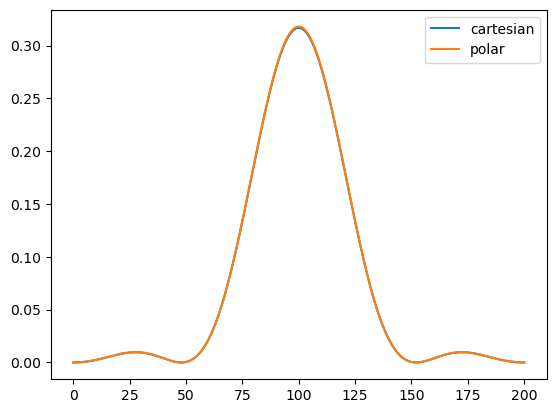

In [176]:
center_idx = 100
x1 = x[center_idx, :]
y1 = y[center_idx, :]

plt.figure()
plt.plot(x1, label="cartesian")
plt.plot(y1, label="polar")
plt.legend()
plt.show()


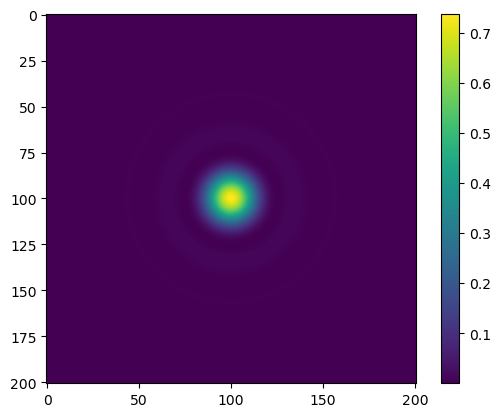

In [70]:
x = torch.linspace(-fov/2, fov/2, n_pix_psf)
xx, yy = torch.meshgrid(x, x, indexing='ij')
r = torch.sqrt(xx ** 2 + yy ** 2).unsqueeze(0).unsqueeze(0).unsqueeze(-1)

k = 2 * np.pi / wavelength

theta_max = np.arcsin(NA)
theta = torch.linspace(0, theta_max, n_pix_pupil)
sin_t = torch.reshape(torch.sin(theta), (1, 1, 1, 1, -1))

airy = ((1-np.cos(theta_max)) * 2 * torch.special.bessel_j1(k * r + 1e-10) / (k * r + 1e-10)) ** 2

plt.figure()
plt.imshow(airy.squeeze())
plt.colorbar()
plt.show()


tensor(0.1789)


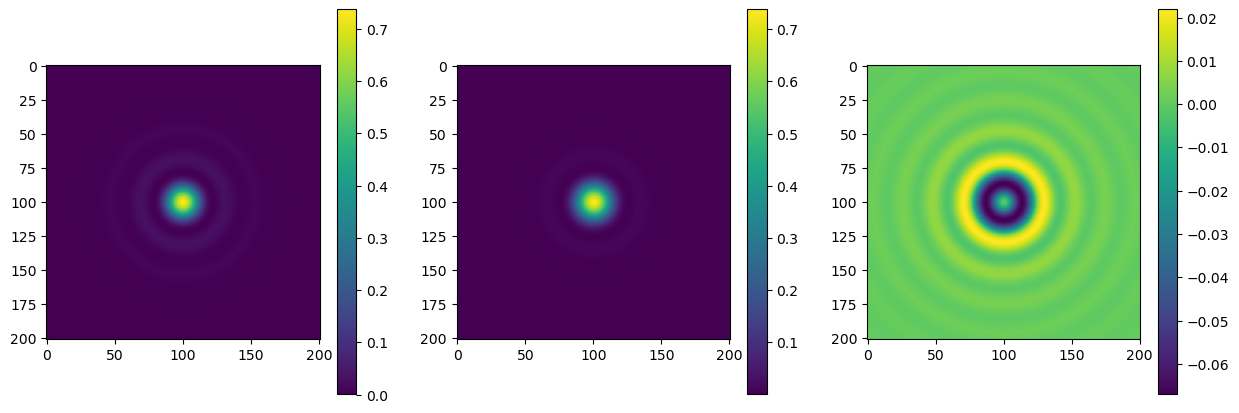

In [74]:
x = torch.abs(field1[idx,...].squeeze())**2
y = torch.abs(field2[idx,...].squeeze())**2
z = airy.squeeze()

# norm error
print(torch.norm(y - z) / torch.norm(z))

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(y)
plt.colorbar()
plt.subplot(132)
plt.imshow(z)
plt.colorbar()
plt.subplot(133)
plt.imshow(y - z)
plt.colorbar()
plt.show()

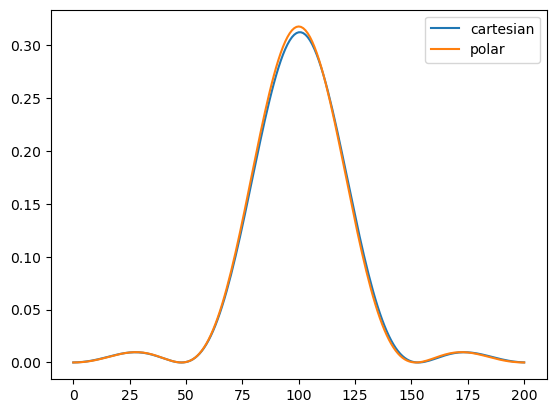

In [124]:
center_idx = 100
x1 = x[center_idx, :]
y1 = y[center_idx, :]
# z1 = z[center_idx, :]

plt.figure()
plt.plot(x1, label="cartesian")
plt.plot(y1, label="polar")
# plt.plot(z1, label="airy")
plt.legend()
plt.show()


In [ ]:
a = torch.abs(field1.squeeze())**2
b = torch.abs(field2.squeeze())**2
metric = torch.sum((a-b)**2) / torch.sum(a**2)
print(metric)


tensor(0.3482)


In [ ]:
a/b

tensor([[0.7519, 0.6809, 0.6252,  ..., 0.6872, 0.7552, 0.8421],
        [0.6809, 0.6247, 0.5794,  ..., 0.6321, 0.6871, 0.7557],
        [0.6252, 0.5794, 0.5418,  ..., 0.5869, 0.6325, 0.6881],
        ...,
        [0.6872, 0.6321, 0.5869,  ..., 0.6315, 0.6851, 0.7506],
        [0.7552, 0.6871, 0.6325,  ..., 0.6851, 0.7500, 0.8312],
        [0.8421, 0.7557, 0.6881,  ..., 0.7506, 0.8312, 0.9346]])